In [1]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
import h5py
import pandas as pd

Using TensorFlow backend.


In [2]:
Inputs = Input(shape=(16,))
x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name='fc1_relu')(Inputs)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc2_relu')(x)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc3_relu')(x)
predictions = Dense(5, activation='softmax', kernel_initializer='lecun_uniform', name = 'output_softmax')(x)
model = Model(inputs=Inputs, outputs=predictions)

In [3]:
f = h5py.File('../processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth.z', 'r')
treeArray = f['t_allpar_new'][()]

features = ['j_zlogz', 'j_c1_b0_mmdt', 'j_c1_b1_mmdt', 'j_c1_b2_mmdt', 'j_c2_b1_mmdt', 'j_c2_b2_mmdt', 
            'j_d2_b1_mmdt', 'j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 
            'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 'j_n2_b1_mmdt', 'j_n2_b2_mmdt', 'j_mass_mmdt', 'j_multiplicity']
labels = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t']

features_labels_df = pd.DataFrame(treeArray,columns=list(set(features+labels)))
features_labels_df = features_labels_df.drop_duplicates()

features_val = features_labels_df[features].values #Convert to numpy array
labels_val = features_labels_df[labels].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features_val, labels_val, test_size=0.2, random_state=42)

## Training

In [5]:
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 100, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/100
58/58 [==============================] - 0s 4ms/step - loss: 2.7082 - accuracy: 0.1163 - val_loss: 1.8567 - val_accuracy: 0.2502
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 1.4950 - accuracy: 0.2852 - val_loss: 1.0476 - val_accuracy: 0.2265
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 0.7258 - accuracy: 0.2624 - val_loss: 0.5311 - val_accuracy: 0.3131
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.3610 - val_loss: 0.4524 - val_accuracy: 0.3734
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.3862 - val_loss: 0.4437 - val_accuracy: 0.3912
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.3923 - val_loss: 0.4394 - val_accuracy: 0.3927
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.3987 - val_loss: 0.4363 - val_accuracy: 0.3951
Epoch 8/100
5

58/58 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.6204 - val_loss: 0.3590 - val_accuracy: 0.6147
Epoch 59/100
58/58 [==============================] - 0s 3ms/step - loss: 0.3541 - accuracy: 0.6212 - val_loss: 0.3586 - val_accuracy: 0.6131
Epoch 60/100
58/58 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.6213 - val_loss: 0.3573 - val_accuracy: 0.6163
Epoch 61/100
58/58 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.6234 - val_loss: 0.3573 - val_accuracy: 0.6145
Epoch 62/100
58/58 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.6246 - val_loss: 0.3562 - val_accuracy: 0.6204
Epoch 63/100
58/58 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.6246 - val_loss: 0.3554 - val_accuracy: 0.6213
Epoch 64/100
58/58 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.6270 - val_loss: 0.3544 - val_accuracy: 0.6208
Epoch 65/100
58/58 

In [7]:
model.save('3_layers_DNN')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 3_layers_DNN\assets


In [8]:
loaded_model = keras.models.load_model('3_layers_DNN') #Loads from local directory

In [9]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
fc1_relu (Dense)             (None, 64)                1088      
_________________________________________________________________
fc2_relu (Dense)             (None, 32)                2080      
_________________________________________________________________
fc3_relu (Dense)             (None, 32)                1056      
_________________________________________________________________
output_softmax (Dense)       (None, 5)                 165       
Total params: 4,389
Trainable params: 4,389
Non-trainable params: 0
_________________________________________________________________


## Validation

In [10]:
import matplotlib.pyplot as plt

In [11]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

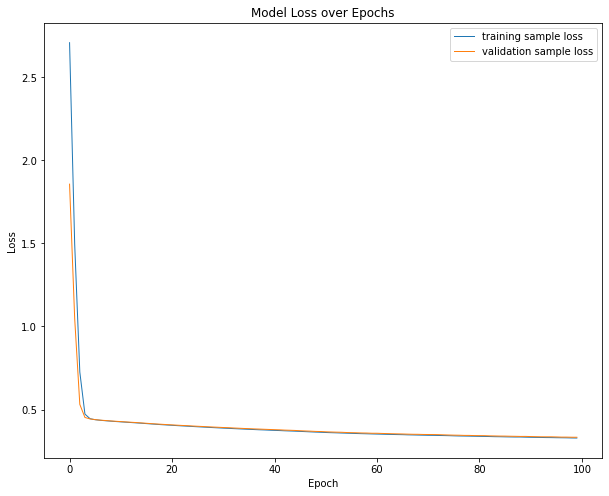

In [12]:
learningCurve(history)

In [13]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'DNN ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

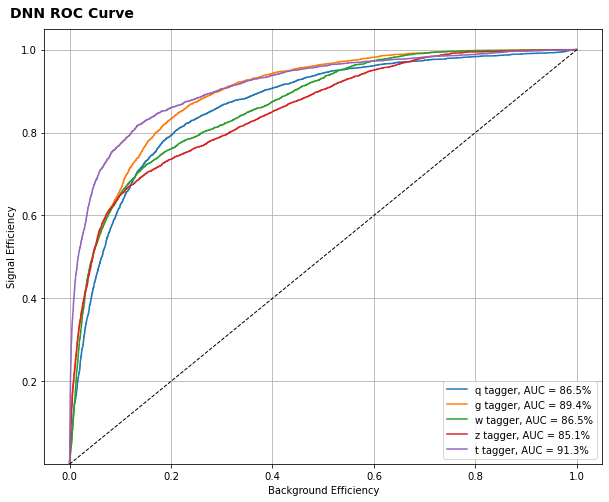

In [14]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='3_layers_DNN')